In [1]:
                                                     #Insurance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans

In [4]:
ir = pd.read_csv("Insurance Dataset.csv")

print(ir.describe())         #shows the summary.
ir.info()                    #Shows the information along with null values.

       Premiums Paid         Age  Days to Renew   Claims made         Income
count     100.000000  100.000000     100.000000    100.000000     100.000000
mean    12542.250000   46.110000     120.400000  12578.993367  102250.000000
std      6790.731666   13.887641      88.055767  13695.906762   43517.237964
min      2800.000000   23.000000       1.000000   1978.260870   28000.000000
25%      6975.000000   34.000000      56.000000   5220.648735   65125.000000
50%     11825.000000   45.000000      89.000000   8386.043907  102250.000000
75%     15475.000000   54.500000     186.500000  14670.889520  139375.000000
max     29900.000000   82.000000     321.000000  99676.744190  176500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-

In [5]:
#now we have to standardize the data.

def std_fn(x):
    y=(x-x.min())/(x.std())
    return (y)

ir_std = std_fn(ir.iloc[ : , 0:])
ir_std.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.434639,1.664070,1.355959,0.774007,1.706220
std,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.614809,0.792071,0.624604,0.236741,0.853110
50%,1.329017,1.584142,0.999367,0.467861,1.706220
75%,1.866515,2.268204,2.106620,0.926746,2.559331
max,3.990733,4.248382,3.634061,7.133407,3.412441


In [22]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(1,7))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(ir_std)
    TWSS.append(kmeans.inertia_)
    
TWSS

[495.0000000000001,
 313.9598382488576,
 246.8452392400786,
 198.16790701960366,
 155.78498869450766,
 129.35395225346497]

Text(0, 0.5, 'total_within_SS')

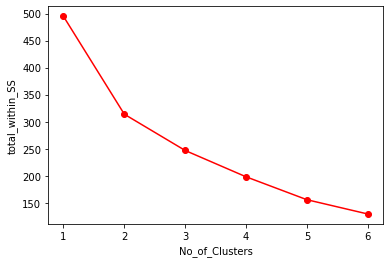

In [23]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [44]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(ir_std)

model.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [45]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object  
ir['category'] = mb # creating a  new column and assigning it to new column 
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
 5   category       100 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 4.4 KB


In [46]:
ir_final = ir.iloc[:,[5,0,1,2,3,4]]
ir_final

,category,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0,2800,26,233,3890.076336,28000
1,0,2950,27,130,2294.444444,29500
2,0,3100,28,144,2564.545455,31000
3,0,3250,30,65,1978.260870,32500
4,0,3400,32,56,2009.090909,34000
...,...,...,...,...,...,...
95,2,25575,63,76,16161.979170,170500
96,2,25800,62,166,23715.151520,172000
97,2,26025,59,167,24043.401020,173500
98,2,26250,58,245,40147.058820,175000


In [47]:
ir.iloc[:,0: ].groupby(ir.category).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income,category
category,,,,,,
0,7271.354167,41.208333,124.020833,6900.428086,64093.750000,0
1,14931.944444,46.500000,76.305556,9982.880874,130583.333333,1
2,22978.125000,59.937500,208.750000,35455.942319,152968.750000,2
